<a href="https://colab.research.google.com/github/Divyanshu-ISM/Oil-and-Gas-data-analysis/blob/master/ReservoirHeterogeneity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#There are essentially two types of heterogeneity:
• Vertical heterogeneity
• Areal heterogeneity

#Vertical Heterogeneity
One of the first problems encountered by the reservoir engineer in predicting or interpreting fluid displacement behavior during secondary
recovery and enhanced oil recovery processes is that of organizing and
using the large amount of data available from core analysis. Permeabilities pose particular problems in organization because they usually vary
by more than an order of magnitude between different strata. The engineer must be able then to:
• Describe the degree of the vertical heterogeneity in mathematical
terms, and
• Describe and define the proper permeability stratification of the pay
zone. This task is commonly called the zoning or layering problem.

The following are the two most widely used descriptors of
the vertical heterogeneity of the formation:
#1. Dykstra-Parsons permeability variation V
#2. Lorenz coefficient L

In [6]:
#STEP 1 : The Data

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [8]:
df = pd.read_csv('Perm.csv.txt',sep=' ',index_col=None)

In [9]:
kh_data = df[['a','b']]

In [10]:
kh_data.columns = ['k','h']

In [11]:
total_thickness = kh_data['h'].sum()
print(f'The total reservoir thickness is= {total_thickness} ft.')

The total reservoir thickness is= 56.0 ft.


In [12]:
h = list(kh_data['h'])

sum = 0
cum_h = [0]

for i in range(len(h)-1):
  sum = sum + h[i]
  cum_h.append(sum)



In [13]:
kh_data['h with greater k'] = cum_h

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
kh_data['%h with greater k'] = kh_data['h with greater k'].apply(lambda x : (x/56)*100)

In [15]:
kh_data

,k,h,h with greater k,%h with greater k
0,435,2.0,0.0,0.000000
1,254,2.0,2.0,3.571429
2,196,2.0,4.0,7.142857
3,172,3.0,6.0,10.714286
4,166,2.0,9.0,16.071429
5,158,2.0,11.0,19.642857
6,153,2.0,13.0,23.214286
7,147,2.0,15.0,26.785714
8,128,1.0,17.0,30.357143
9,105,2.0,18.0,32.142857


In [16]:
#Hence our required dataset is prepared

In [17]:
#Step 2: Plotting

In [85]:
kh_data['%h with greater k'][0] = 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [86]:
X = kh_data[['%h with greater k']].values
y = kh_data[['k']].values
y = np.array(y).reshape(26,)

# Evaluating k50 and k84.1 since - 
The Dykstra-Parsons permeability variation is defined by the following expression:
# V = [k(50) - k(84.1)]/k(50)


In [87]:
X = np.log(X).reshape(26,)
slope, intercept, r_value, p_value, std_err = stats.linregress(X,y)

In [88]:
k50 = slope*np.log(50) + intercept
print(f"k50 = {k50} md")
k84_1 = slope*np.log(84.1) + intercept
print(f"k84.1 = {k84_1} md")

k50 = 70.55707045142475 md
k84.1 = 27.361113180695554 md


In [89]:
#Hence,
V = (k50 - k84_1)/k50
print(f"The Dykstra-Parsons permeability variation is = {V}")

The Dykstra-Parsons permeability variation is = 0.6122130212374336


In [90]:
yp = slope*X + intercept

Text(0.5, 1.0, "Dykstra-Psrson's plot")

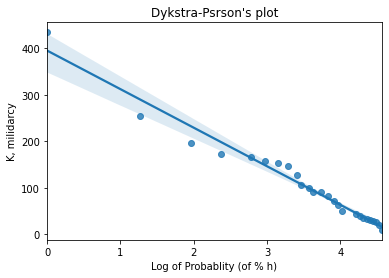

In [158]:
sns.regplot(X,y,)
plt.xlabel('Log of Probablity (of % h)')
plt.ylabel('K, milidarcy')
plt.title("Dykstra-Psrson's plot" )

In [94]:
#Note that you can either take the log of x-values and plot on cartesian or 
# take the original values with x-axis being logarithmic. Same thing!


#2. Lorrenz Plot

1. Lorenz coefficient in terms of permeability variation:
L = 0.0116356 + 0.339794*V + 1.066405*V^2 - 0.3852407*V^3 

2. Permeability variation in terms of Lorenz coefficient:
V = -5.05971*(10-4) + 1.747525L - 1.468855*L^2 + 0.701023*L^3 


In [95]:
L = 0.0116356 + 0.339794*V + 1.066405*(V**2) - 0.3852407*(V**3)

In [96]:
print(L)

0.5309581332510235


In [97]:
#Let's do this in a more explainable way!

In [99]:
lp_data = kh_data[['k','h']]

In [138]:
h = list(lp_data['h'])

sum = 2
cum_h = [2]

for i in range(1,len(h)):
  sum = sum + h[i]
  cum_h.append(sum)

In [139]:
lp_data['kh'] = lp_data['k']*lp_data['h']
lp_data.head(2)

,k,h,kh,cum_h,cum_kh
0,435,2.0,870.0,0.0,870.0
1,254,2.0,508.0,2.0,1378.0


In [140]:
kh = list(lp_data['kh'])
sum1 = 870
cum_kh = [870]

for j in range(1,len(kh)):
  sum1 = sum1 + kh[j]
  cum_kh.append(sum1)

In [141]:
lp_data['cum_h'] = cum_h

In [142]:
lp_data['cum_kh'] = cum_kh

In [143]:
lp_data

,k,h,kh,cum_h,cum_kh
0,435,2.0,870.0,2.0,870.0
1,254,2.0,508.0,4.0,1378.0
2,196,2.0,392.0,6.0,1770.0
3,172,3.0,516.0,9.0,2286.0
4,166,2.0,332.0,11.0,2618.0
5,158,2.0,316.0,13.0,2934.0
6,153,2.0,306.0,15.0,3240.0
7,147,2.0,294.0,17.0,3534.0
8,128,1.0,128.0,18.0,3662.0
9,105,2.0,210.0,20.0,3872.0


In [144]:
lp_data['Norm_kh'] = lp_data['cum_kh']/5671.0

In [145]:
lp_data['Norm_h'] = lp_data['cum_h']/56.0

In [146]:
lp_data

,k,h,kh,cum_h,cum_kh,Norm_kh,Norm_h
0,435,2.0,870.0,2.0,870.0,0.153412,0.035714
1,254,2.0,508.0,4.0,1378.0,0.242991,0.071429
2,196,2.0,392.0,6.0,1770.0,0.312114,0.107143
3,172,3.0,516.0,9.0,2286.0,0.403104,0.160714
4,166,2.0,332.0,11.0,2618.0,0.461647,0.196429
5,158,2.0,316.0,13.0,2934.0,0.517369,0.232143
6,153,2.0,306.0,15.0,3240.0,0.571328,0.267857
7,147,2.0,294.0,17.0,3534.0,0.623171,0.303571
8,128,1.0,128.0,18.0,3662.0,0.645741,0.321429
9,105,2.0,210.0,20.0,3872.0,0.682772,0.357143


Text(0.5, 1.0, 'Lorenz Plot: Area b/w plots gives hetrogeneity!')

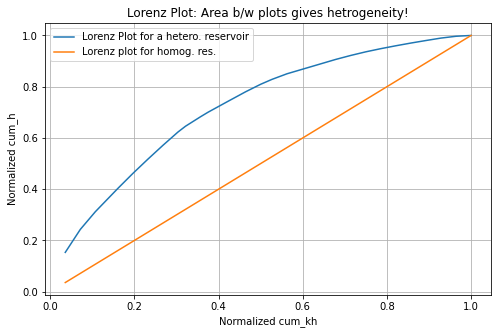

In [157]:
plt.figure(figsize=(8,5))
plt.grid()
plt.plot(lp_data['Norm_h'],lp_data['Norm_kh'],label='Lorenz Plot for a hetero. reservoir')
plt.plot(lp_data['Norm_h'],lp_data['Norm_h'],label='Lorenz plot for homog. res.')
plt.legend()
plt.xlabel('Normalized cum_kh')
plt.ylabel('Normalized cum_h')
plt.title('Lorenz Plot: Area b/w plots gives hetrogeneity!')

In [159]:
#Conclusion- Greater the area between the two plots- Greater would be the Reservoir Heterogeneity.